In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

1. What are different geometric transformations? Apply them on an image.


(<Axes: title={'center': 'Perspective'}>,
 Text(0.5, 1.0, 'Perspective'))

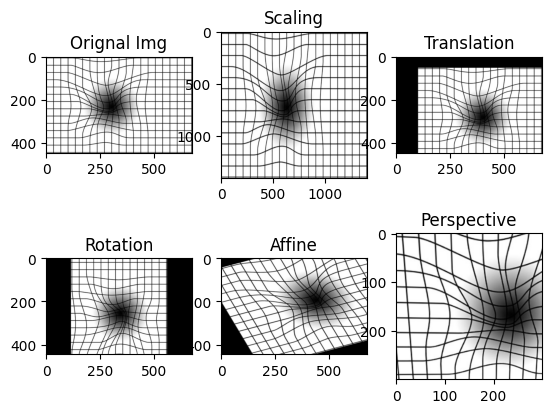

In [11]:
img = cv2.imread('/content/grid.jpg')

rows = img.shape[0]
cols = img.shape[1]

plt.subplot(231)
plt.title('Orignal Img')
plt.imshow(img)


# Scaling

img_scale = cv2.resize(img,(1400,1400))

plt.subplot(232), plt.title('Scaling'), plt.imshow(img_scale)

# Translation


M = np.float32([[1,0,100],[0,1,50]])
img_translation = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(233), plt.title('Translation'), plt.imshow(img_translation)


# Rotation

M = cv2.getRotationMatrix2D(((cols-1)/2,(rows-1)/2),90,1)
img_rotate = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(234), plt.title('Rotation'), plt.imshow(img_rotate)

# Affine Transformation


pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv2.getAffineTransform(pts1,pts2)
img_affine = cv2.warpAffine(img,M,(cols,rows))


plt.subplot(235),plt.imshow(img_affine),plt.title('Affine')


# Perspective Trasformation

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv2.getPerspectiveTransform(pts1,pts2)
img_perspective = cv2.warpPerspective(img,M,(300,300))


plt.subplot(236),plt.imshow(img_perspective),plt.title('Perspective')


2. Create a transparent background image and add any LOGO at the center of it.



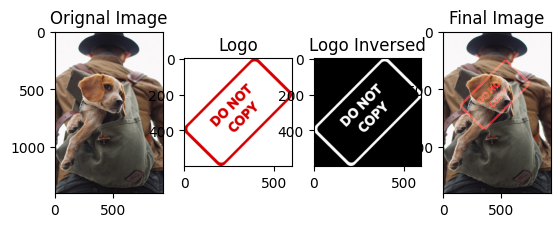

In [41]:
Img = cv2.imread('/content/dog_backpack.jpg')
Img = cv2.cvtColor(Img,cv2.COLOR_BGR2RGB)

Img_final = Img.copy()

logo =  cv2.imread('/content/watermark_no_copy.png')
logo =  cv2.cvtColor(logo,cv2.COLOR_BGR2RGB)
logo = cv2.resize(logo,(600,600))

x_end = 750
y_end = 850

x_st = x_end - logo.shape[1]
y_st = y_end - logo.shape[0]

cut = Img_final[y_st:y_end,x_st:x_end]

logo_gray = cv2.cvtColor(logo,cv2.COLOR_RGB2GRAY)
mask_inv = cv2.bitwise_not(logo_gray)


fg = cv2.bitwise_or(logo,logo,mask = mask_inv)

final_cut = cv2.bitwise_or(cut,fg)

Img_final[y_st:y_end,x_st:x_end] = final_cut


plt.subplot(141)
plt.imshow(Img)
plt.title('Orignal Image')

plt.subplot(142)
plt.imshow(logo)
plt.title('Logo')

plt.subplot(143)
plt.imshow(mask_inv,cmap="gray")
plt.title('Logo Inversed')

plt.subplot(144)
plt.imshow(Img_final)
plt.title('Final Image')

plt.show()

3. What are different ways of image Blurring.? Produce blurred images for each technique.



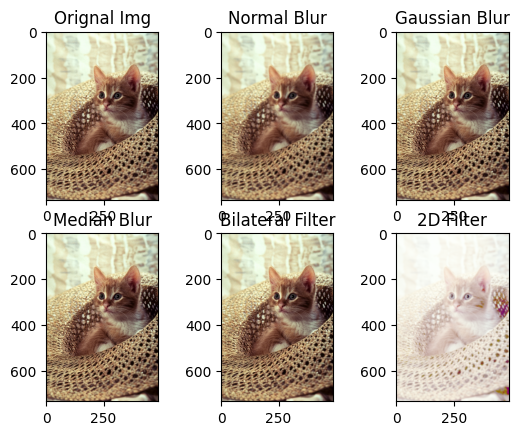

In [25]:
def load_img():
    img = cv2.imread('/content/x2.png').astype(np.float32)/255
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    return img

img =load_img()
plt.subplot(231)
plt.title('Orignal Img')
plt.imshow(img)

# Averaging

img1 = img.copy()
blur = cv2.blur(img1,ksize=(5,5))

plt.subplot(232)
plt.title('Normal Blur')
plt.imshow(blur)

# Gaussian Bluring

img_gaus = img.copy()
blur = cv2.GaussianBlur(img_gaus,(5,5),10)

plt.subplot(233)
plt.title('Gaussian Blur')
plt.imshow(img_gaus)


# Median Blurring

img_med = img.copy()
blur = cv2.medianBlur(img_med,5,10)

plt.subplot(234)
plt.title('Median Blur')
plt.imshow(img_med)
              #Good in reducing the noise

# Bilateral Filter

img_bilateral = img.copy()
blur = cv2.bilateralFilter(img_bilateral,9,75,75)

plt.subplot(235)
plt.title('Bilateral Filter')
plt.imshow(img_bilateral)
              #just like medianBlur but keeps the edges sharpe.


# 2D Filter

result = np.power(img,1/5)
kernel = np.ones(shape=(5,5),dtype=np.float32)/25
img_2Dfilter = cv2.filter2D(result,-1,kernel)

plt.subplot(236)
plt.title('2D Filter')
plt.imshow(img_2Dfilter)

4. What are histograms? Analyze an image using histograms. How can we tell if an image has high contrast or low contrast using histograms.



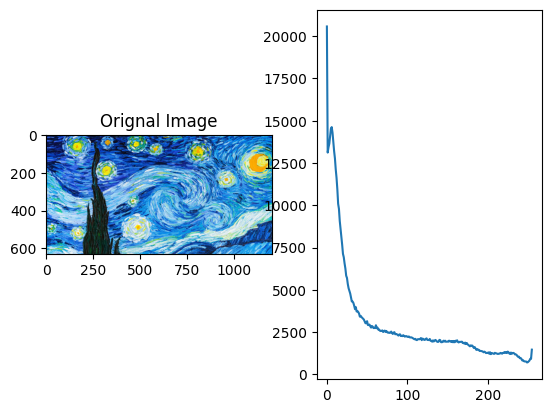

In [46]:
# Histogram is plot of pixel values of an Image
# with X-axis Values
# and Y-axis Intensity


# This Histogram Shows High Intensity around shades of Blue (0) Since for OpenCV its BGR(0,0,0)

Img = cv2.imread('/content/StarryNight.jpg')
Img = cv2.cvtColor(Img,cv2.COLOR_BGR2RGB)

histogram1 = cv2.calcHist([Img],[0],None,[256],[0,256])


plt.subplot(121)

plt.imshow(Img)
plt.title('Orignal Image')

plt.subplot(122)
plt.plot(histogram1)
plt.show()

5. What is HSV color space? What is the difference between images read by OpenCV and matplotlib?

 **ANSWER**

HSV stands for Hue, Saturation and Value, it corresponds better color experience compared to RGB color space.


Color reading order is one of the biggest difference
OpencCV reads Images in BGR color convention
where as matplotlib reads them as RGB color convention


6. What is Sobel Filter? What is the difference between a low pass filter and a high pass filter.


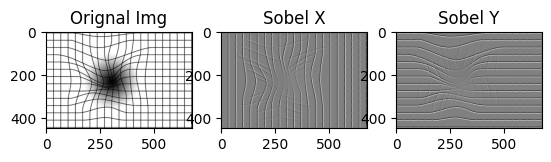

In [32]:
# Sobel operator is a join Gaussian smoothing and diffrentiation operator that is used to detect edges by sudden change in pixel intensity


img = cv2.imread('/content/grid.jpg',0)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(131),plt.imshow(img,cmap='gray'),plt.title("Orignal Img")
plt.subplot(132),plt.imshow(sobelx,cmap='gray'),plt.title("Sobel X")
plt.subplot(133),plt.imshow(sobely,cmap='gray'),plt.title("Sobel Y")
plt.show()



7. Apply Morphological transformations on a “starry night” image.


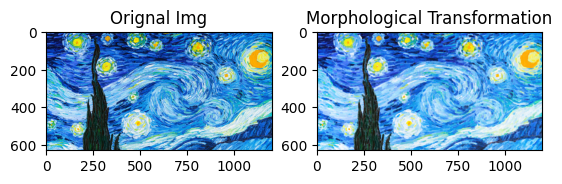

In [30]:
starryImg = cv2.imread('/content/StarryNight.jpg')
starryImg = cv2.cvtColor(starryImg,cv2.COLOR_BGR2RGB)
clear = cv2.morphologyEx(starryImg,cv2.MORPH_CLOSE,kernel)
plt.subplot(121),plt.imshow(starryImg),plt.title("Orignal Img")
plt.subplot(122),plt.imshow(clear),plt.title("Morphological Transformation")
plt.show()


8. Why do we need Image thresholding? What are the different techniques of thresholding? Implement adaptive thresholding using OpenCV.

(<Axes: title={'center': 'Adaptive Thresholding'}>,
 Text(0.5, 1.0, 'Adaptive Thresholding'))

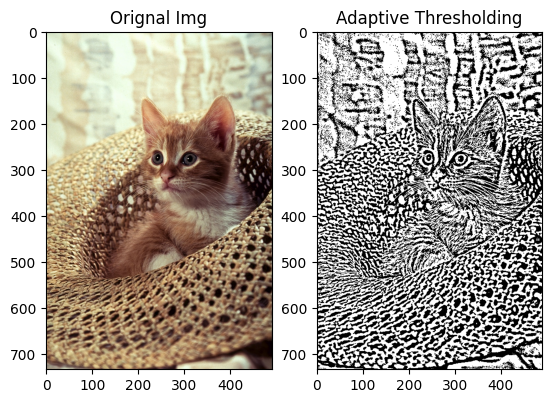

In [35]:
#Image thresholding is used on Images to diffrentiate between foreground and background

# Simple Thresholding
    # Binary , Binary_Inv, Trunc , Trunc_Inv , Tozero ,Tozero_Inv
# Adaptive Thresholding
# Otsu's Binarization

img = cv2.imread('/content/x2.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

th2 = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)


plt.subplot(121) , plt.imshow(img), plt.title('Orignal Img')

plt.subplot(122) , plt.imshow(th2,cmap='gray') , plt.title('Adaptive Thresholding')